<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_YB_week12_2_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07 군집화

#### **01 K-평균 알고리즘 이해**

K-평균: 군집 중심점(centroid) 특정 임의 지점 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

- 선택된 포인프 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- *모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법*

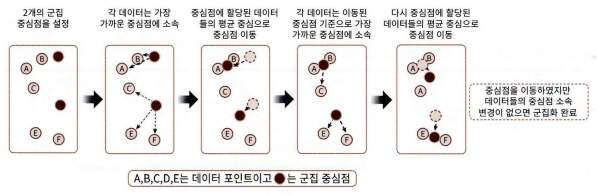

1. 군집화 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음 => 초기화 알고리즘응로 적합한 위치에 중심점
2. 가장 가까운 곳에 위치한 중심점에 소속
3. 군집 중심점을 소속된 데이터의 평균 중심점으로 이동 (A,B 평균 위치 / C,E,F 평균 위치)
4. 각 데이터가 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속 변경 (C)
5. 다시 중심을 소속된 데이터 평균 중심으로 이동
6. 데이터 중심점 소속 변경이 없으면 군집화 종료

**장점**

- 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

**단점**
- 거리 기반 알고리즘 => 속성 개수가 매우 많을 경우 군집화 정확도가 떨어짐
- 반복 횟수 많을 경우 수행 시간 매우 느려짐
- 군집(cluster) 개수 선택 가이드 어려움

##### **사이킷런 KMeans 클래스 소개**



```
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_ini=10, max_iter=300, tol=0.00001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')
```



- n_clusters: 군집 중심점 개수(군집화할 개수)
- init: 초기 군집 중심점 좌표 설정할 방식
- max_iter: 최대 반복 횟수

##### **K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- labels_의 값이 0,1,2 => 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


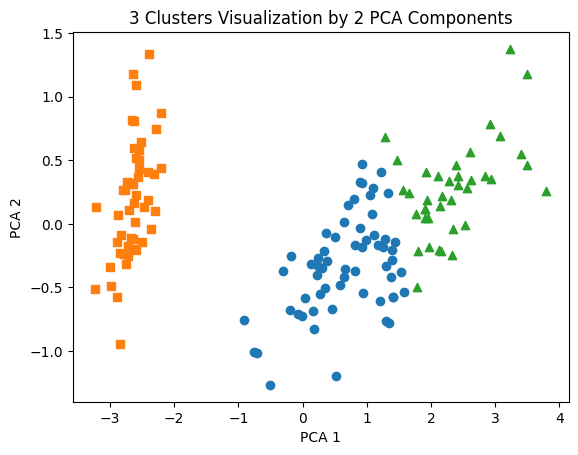

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- Cluster 1 나타내는 네모('s')는 명확히 다른 군집과 잘 분리됨
- Cluster 0, Cluster 2 나타내는 동그라미('o'), 세모('^')는 상당 수준 분리돼 있지만 네모만큼 명확하지 않음

##### **군집화 알고리즘 테스트를 위한 데이터 생성**

*make_blobs()*
- n_samples: 생성할 총 데이터 개수
- n_features: 데이터 피처 개수
- centers: int 값 (ndarray 형태로 표현할 경우 개별 군집 중심점 좌표)
- cluster_std: 생성될 군집 데이터의 표준 편차

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


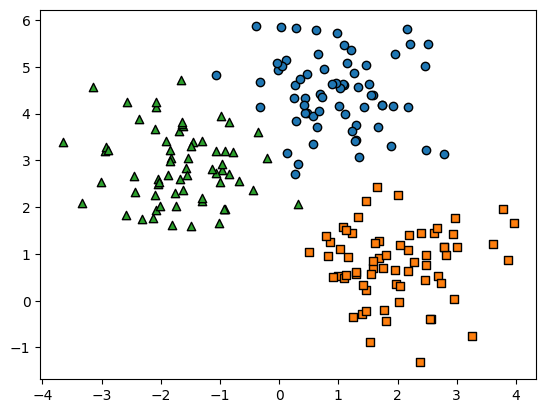

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

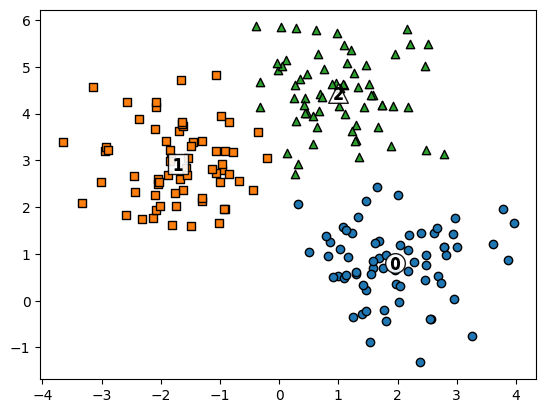

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스트링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


- make_blobs(): cluster_std 파라미터로 데이터 분포도 조절
- cluster_std 작을수록 군집 중심에 데이터가 모여 있고, 클수록 데이터가 퍼져 있음

#### **02 군집 평가(Cluster Evaluation)**

##### **실루엣 분석의 개요**

실루엣 분석(silhouette analysis): 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄 => 다른 군집과의 거리는 떨어져 있고 동일 군집거리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수(silhouette coefficient: 개별 데이터가 가지는 군집화 지표)를 기반
- 개별 데이터가 가지는 실루엣 계수: 해당 데이터가 같은 군집 내 데이터와 얼마나 가깝게 군집화돼 있고 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지 나타내는 지표

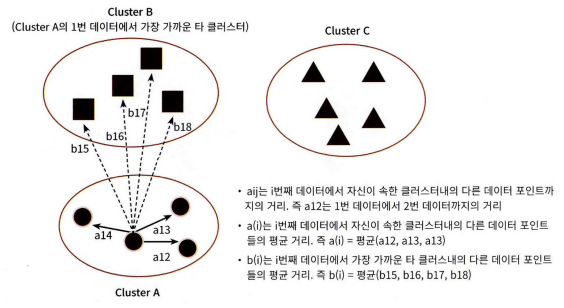

- 특정 데이터 포인트 실루엣 계수 값: 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 가장 가까운 군집과의 평균 거리 b(i) 기반으로 계산

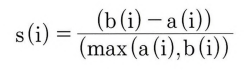

좋은 군집화가 되기 위한 조건
1. 전체 실루엣 계수 평균값, 즉 사이킷런 silhouette_score() 값이 1에 가까울수록 좋음
2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 함
    
    = 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것

##### **붓꽃 데이터 세트를 이용한 군집 평가**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


##### **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

- 전체 데이터 평균 실루엣 계수 값이 높다고 반드시 최적 군집 개수로 군집화가 잘 됐다고 볼 수는 없음
- 특정 군집 내 실루엣 게수 값만 너무 높고, 다른 군집은 내부 데이터끼리 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음
- *개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우* **K-평균**의 *적절한 군집 개수가 설정됐다고 판단*

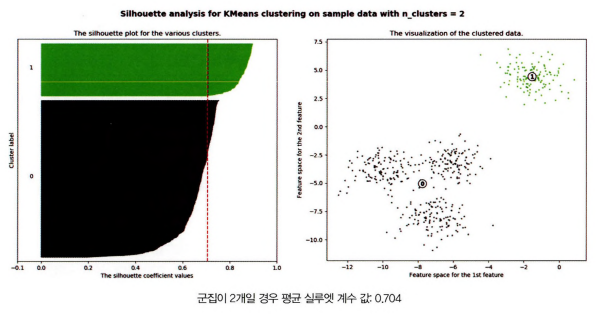

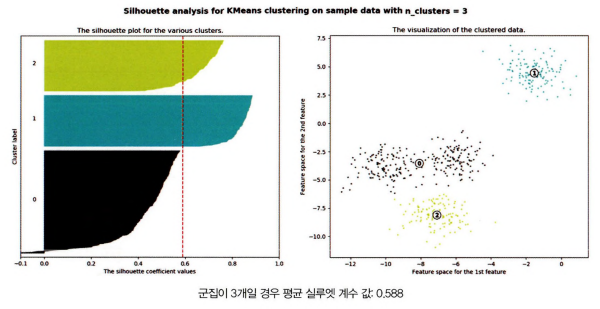

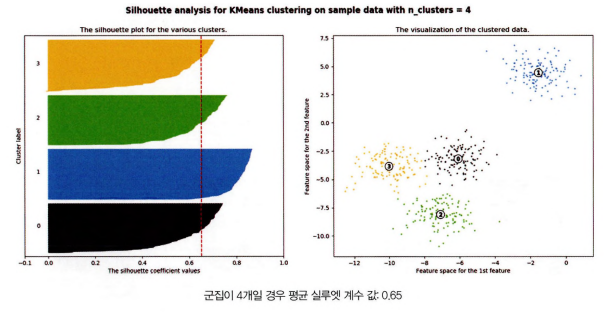

- 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치
- 군집이 2개인 경우보다 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단



```
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

```





```
# 붓꽃 데이터 K-평균 수행 시 최적 군집 개수
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)
```



- 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어남
- 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안 고민